In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [25]:
files = os.listdir(f"{os.getcwd()}/experiment_results")
dataframes = {}
for file_name in files:
    column_name = f"total_time_{file_name}".strip(".csv")
    dataframes[column_name] = pd.read_csv(f"{os.getcwd()}/experiment_results/{file_name}")["total-time"]

In [55]:
# Save as DataFrame and show
results = pd.DataFrame(dataframes)
print(results.head())



   total_time_Y, LCB  total_time_C, LCA  total_time_Y, LCA  total_time_C, LCB
0              10000              10000                668              10000
1              10000              10000              10000              10000
2              10000              10000              10000              10000
3              10000              10000                667              10000
4              10000              10000              10000              10000


In [49]:
# Extract the number of times that conflict occured
conflict_count = {}
for column in results.columns:
    column_name = column.strip("total_time_")
    conflict_count[column_name] = (results[column].values == 10000).sum()

100
98
77
28


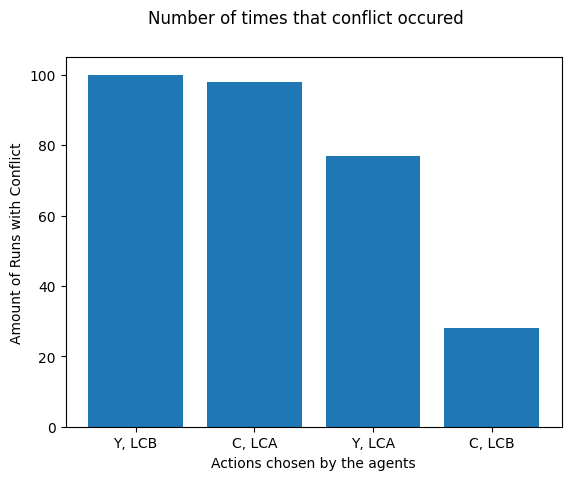

In [54]:
# Plot number of times that conflict occured
plt.bar(conflict_count.keys(), conflict_count.values())
plt.suptitle("Number of times that conflict occured")
plt.xlabel("Actions chosen by the agents")
plt.ylabel("Amount of Runs with Conflict")
plt.savefig("out/ConflictOccurence")
plt.show()